# 젊은 세대의 우울증에 관한 분석

최근 2-30대 '청년 우울증'의 문제가 심각하게 대두됨.\
인도는 매년 1만명 이상의 수준의 학생이 스스로 목숨을 끊는 선택.\
데이터가 수집된 인도의 학생 우울증 자료를 토대로 데이터를 분석, 이후 한국 청년에 도움될만 한가에 관한 고찰.

# 목적

조사된 자료를 토대로 간단한 조사만으로 우울증 여부를 진단할 수 있는 데이터를 만들기 위함.\
가정, 학교, 회사에서 긴 검사가 필요하지 않고 5분 이내로 빠르게 분석해서 우울증을 예방하는 데 도움을 주기 위함.

# 데이터 불러오기

In [1]:
import pandas as pd

df = pd.read_csv("Student Depression Dataset.csv")

df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


# 전처리(1차)

In [2]:
df = df.drop('id', axis=1)

분석에 필요 없는 id 열 삭제

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  int64  
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  int64  
 5   Work Pressure                          27901 non-null  int64  
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  int64  
 8   Job Satisfaction                       27901 non-null  int64  
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

Financial Stress(금전적 스트레스)에만 결측치가 있음을 확인

In [4]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


27901개 중 단 3개의 결측값이 존재하므로 데이터 분석에 큰 영향을 미치 않을 것으로 판단하여 결측값 제거

In [5]:
df = df.dropna().reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27898 entries, 0 to 27897
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27898 non-null  object 
 1   Age                                    27898 non-null  int64  
 2   City                                   27898 non-null  object 
 3   Profession                             27898 non-null  object 
 4   Academic Pressure                      27898 non-null  int64  
 5   Work Pressure                          27898 non-null  int64  
 6   CGPA                                   27898 non-null  float64
 7   Study Satisfaction                     27898 non-null  int64  
 8   Job Satisfaction                       27898 non-null  int64  
 9   Sleep Duration                         27898 non-null  object 
 10  Dietary Habits                         27898 non-null  object 
 11  De

# EDA

In [6]:
Gender = df[['Gender', 'Depression']].copy()
Gender = Gender.groupby(['Gender', 'Depression']).size().reset_index(name='Count')
Gender = Gender.groupby(['Gender', 'Depression'])['Count'].sum().unstack()
Gender

Depression,0,1
Gender,,
Female,5132,7220
Male,6431,9115


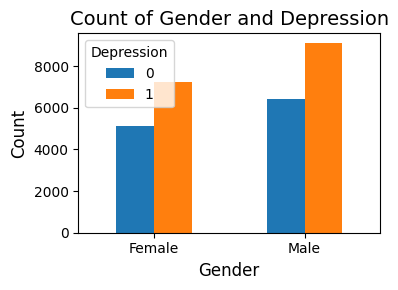

In [7]:
import matplotlib.pyplot as plt

Gender.plot(kind='bar', figsize=(4, 3))

plt.title('Count of Gender and Depression', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

표뵨에서 남성의 수가 더 많고, 우울증 증세를 보인 인원이 그렇지 않은 인원보다 많다.\
다만 압도적으로 표본의 수가 차이나지 않음.

In [8]:
Age = df[['Age', 'Depression']].copy()

bins = [0, 19, 29, 39, 49, 59]
labels = ['10', '20', '30', '40', '50']

Age['Age_Group'] = pd.cut(Age['Age'], bins=bins, labels=labels, right=True)

Age = Age.groupby(['Age_Group', 'Depression'], observed=True).size().reset_index(name='Count')
Age = Age.groupby(['Age_Group', 'Depression'], observed=True)['Count'].sum().unstack()

Age = Age.fillna(0)
Age

Depression,0,1
Age_Group,,
10,831.0,2316.0
20,6456.0,11052.0
30,4263.0,2961.0
40,8.0,6.0
50,5.0,0.0


나이는 너무 범주가 넓어 10대 단위로 범주를 재설정한다.

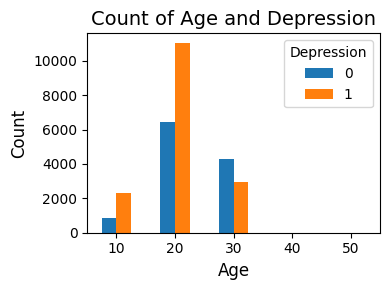

In [9]:
Age.plot(kind='bar', figsize=(4, 3))

plt.title('Count of Age and Depression', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

20대의 데이터가 압도적으로 많아 데이터 불균형으로 인한 문제점 발생 우려.\
청년 우울증과 관련한 분석이 필요하기 때문에 4-50대의 데이터는 고려 대상에서 제외

30대의 경우 우울증 증세를 보이는 인원보다 그렇지 않은 인원의 수가 더 많다.\
우울증 증세를 보인인 인원수가 압도적으로 많은 표본은 10대와 20대. 이 역시 고려 대상

In [10]:
City = df[['City', 'Depression']].copy()
City = City.groupby(['City', 'Depression']).size().reset_index(name='Count')
City = City.groupby(['City', 'Depression'])['Count'].sum().unstack()
City = City.fillna(0)
City.sort_values(by=1, ascending=False).head()

Depression,0,1
City,,
Kalyan,636.0,934.0
Hyderabad,442.0,897.0
Srinagar,609.0,763.0
Vasai-Virar,551.0,739.0
Thane,466.0,673.0


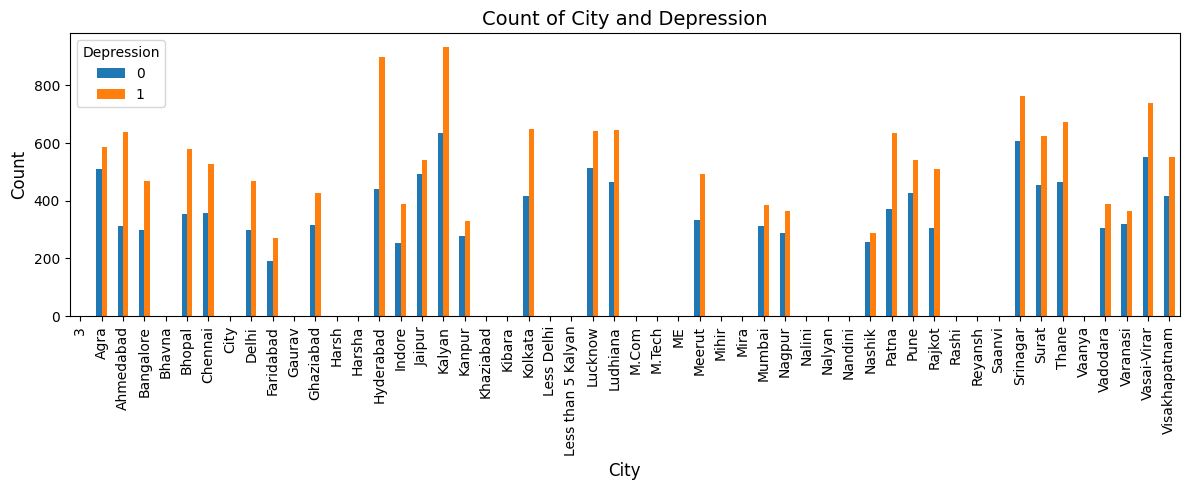

In [11]:
City.plot(kind='bar', figsize=(12, 5))

plt.title('Count of City and Depression', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

상당수의 지역에서 매우 적은 표본으로 인해 분석 모델링 적용 시 불균형으로 인한 오류 발생 위험 있음.

In [12]:
Profession = df[['Profession', 'Depression']].copy()
Profession = Profession.groupby(['Profession', 'Depression']).size().reset_index(name='Count')
Profession = Profession.groupby(['Profession', 'Depression'])['Count'].sum().unstack()
Profession = Profession.fillna(0)
Profession.sort_values(by=1, ascending=False)

Depression,0,1
Profession,,
Student,11560.0,16307.0
Architect,1.0,7.0
Teacher,1.0,5.0
Chef,0.0,2.0
Content Writer,0.0,2.0
Digital Marketer,1.0,2.0
Doctor,0.0,2.0
Pharmacist,0.0,2.0
Civil Engineer,0.0,1.0


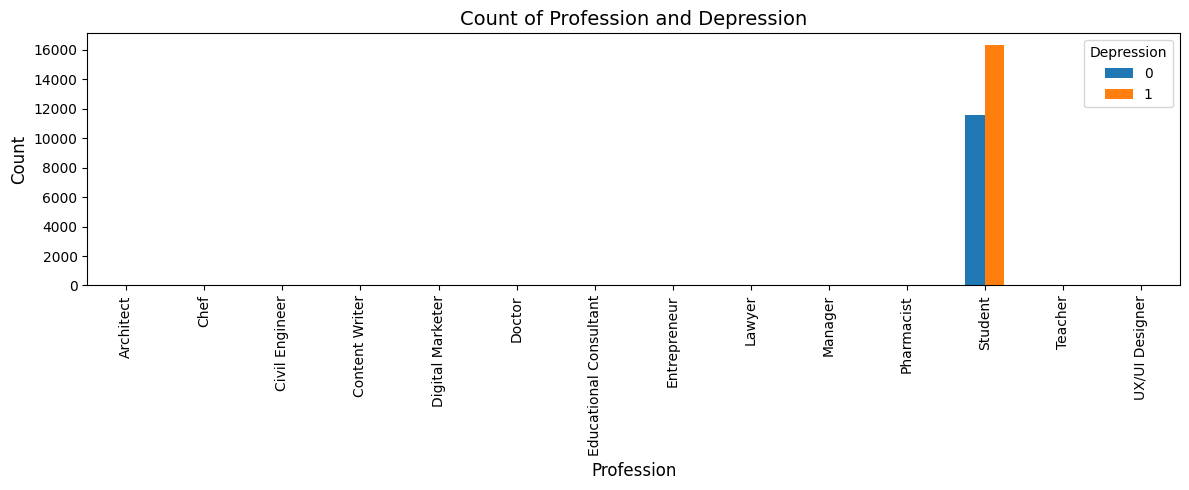

In [13]:
Profession.plot(kind='bar', figsize=(12, 5))

plt.title('Count of Profession and Depression', fontsize=14)
plt.xlabel('Profession', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

Student를 제외한 모든 항목에서 분석이 불가능할 정도로 데이터의 양이 적음.\
젊은 세대의 청년 우울증과 엮을 수 있는 Student 항목만 취합하여 데이터를 전처리.

In [14]:
AP = df[['Academic Pressure', 'Depression']].copy()
AP = AP.groupby(['Academic Pressure', 'Depression']).size().reset_index(name='Count')
AP = AP.groupby(['Academic Pressure', 'Depression'])['Count'].sum().unstack()
AP

Depression,0,1
Academic Pressure,,
0,5,4
1,3868,932
2,2611,1566
3,2973,4488
4,1230,3925
5,876,5420


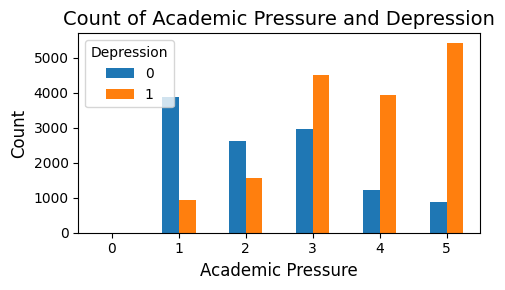

In [15]:
AP.plot(kind='bar', figsize=(5, 3))

plt.title('Count of Academic Pressure and Depression', fontsize=14)
plt.xlabel('Academic Pressure', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

학업적 스트레스(강도)가 0인 인원의 데이터가 불균형을 이루고 있지만, 특수한 상황이라고 판단해 제거하지 않음.\
학업적 스트레스(강도)가 높을수록 우울증 증세를 보이는 비율이 압도적으로 높아짐.

In [16]:
WP = df[['Work Pressure', 'Depression']].copy()
WP = WP.groupby(['Work Pressure', 'Depression']).size().reset_index(name='Count')
WP = WP.groupby(['Work Pressure', 'Depression'])['Count'].sum().unstack()
WP = WP.fillna(0)
WP

Depression,0,1
Work Pressure,,
0,11561.0,16334.0
2,1.0,0.0
5,1.0,1.0


업무 스트레스(강도)의 경우 데이터 불균형을 이루고 있으며,\
학생이라는 특수성을 감안해 변수에서 제거한다.

In [17]:
CGPA = df[['CGPA', 'Depression']].copy()

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

CGPA['CGPA_Group'] = pd.cut(CGPA['CGPA'], bins=bins, labels=labels, right=False)

CGPA = CGPA.groupby(['CGPA_Group', 'Depression'], observed=True).size().reset_index(name='Count')
CGPA = CGPA.groupby(['CGPA_Group', 'Depression'], observed=True)['Count'].sum().unstack()

CGPA = CGPA.fillna(0)
CGPA

Depression,0,1
CGPA_Group,,
0,5,4
5,2400,3002
6,1732,2578
7,2466,3077
8,2315,4087
9,2617,3557


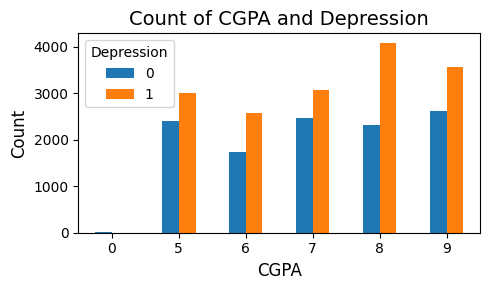

In [18]:
CGPA.plot(kind='bar', figsize=(5, 3))

plt.title('Count of CGPA and Depression', fontsize=14)
plt.xlabel('CGPA', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

CGPA는 특정 교육에 관한 점수이며, 특히 8점대일 때, 가장 우울증 증세를 보이는 인원의 비율이 높음.\
CGPA 점수로만 판단할 수 없음.

In [19]:
SS = df[['Study Satisfaction', 'Depression']].copy()
SS = SS.groupby(['Study Satisfaction', 'Depression']).size().reset_index(name='Count')
SS = SS.groupby(['Study Satisfaction', 'Depression'])['Count'].sum().unstack()
SS

Depression,0,1
Study Satisfaction,,
0,4,6
1,1593,3856
2,2070,3768
3,2467,3353
4,3095,3264
5,2334,2088


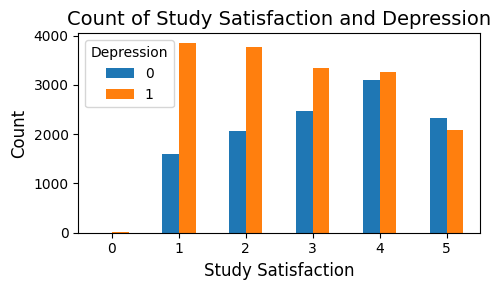

In [20]:
SS.plot(kind='bar', figsize=(5, 3))

plt.title('Count of Study Satisfaction and Depression', fontsize=14)
plt.xlabel('Study Satisfaction', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

본인의 학업 만족도가 높을수록 우울증 증세를 보이는 비율이 현저히 낮아지며,\
매우 만족(5)을 선택한 경우 우울증 증세를 보이는 인워보다 그렇지 않은 인원의 비율이 높음.\
이는 학생의 우울증과 학업 만족도가 긴밀한 관계를 보인다는 것을 알 수 있음.

In [21]:
JS = df[['Job Satisfaction', 'Depression']].copy()
JS = JS.groupby(['Job Satisfaction', 'Depression']).size().reset_index(name='Count')
JS = JS.groupby(['Job Satisfaction', 'Depression'])['Count'].sum().unstack()
JS = JS.fillna(0)
JS

Depression,0,1
Job Satisfaction,,
0,11559.0,16331.0
1,1.0,1.0
2,1.0,2.0
3,1.0,0.0
4,1.0,1.0


직업 만족도의 경우 대부분은 학생이었으며, 실제 평가 역시 0으로 체크되어 있다.\
이를 통해 학업스트레스, 학업 만족도, CGPA 점수가 0으로 평가된 인원들은 학생이 아니라고 판단 가능.\
Job Satisfaction 은 분석 변수에서 삭제.

In [22]:
SD = df[['Sleep Duration', 'Depression']].copy()
SD = SD.groupby(['Sleep Duration', 'Depression']).size().reset_index(name='Count')
SD = SD.groupby(['Sleep Duration', 'Depression'])['Count'].sum().unstack()
SD

Depression,0,1
Sleep Duration,,
5-6 hours,2665,3516
7-8 hours,2975,4371
Less than 5 hours,2948,5361
More than 8 hours,2966,3078
Others,9,9


Others의 경우 응답 포기로 간주.\
전처리 완료 후 다시 체크할 예정.

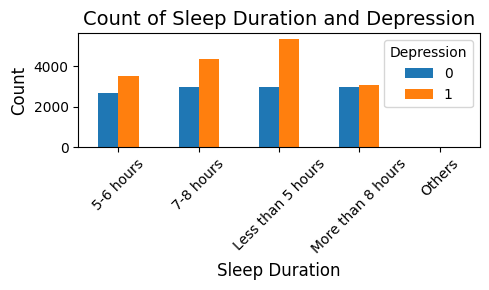

In [23]:
SD.plot(kind='bar', figsize=(5, 3))

plt.title('Count of Sleep Duration and Depression', fontsize=14)
plt.xlabel('Sleep Duration', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

수면 시간이 늘어날수록 우울증 환자가 줄어든다는 결론은 낼 수 없음.\
그러나 수면 시간이 너무 짧으면(5시간 이하) 우울증 증세가 쉽게 찾아오고,\
수면 시간이 8시간 이상일 경우 우울증 증세가 적다는 관계는 파악 가능.

In [24]:
DH = df[['Dietary Habits', 'Depression']].copy()
DH = DH.groupby(['Dietary Habits', 'Depression']).size().reset_index(name='Count')
DH = DH.groupby(['Dietary Habits', 'Depression'])['Count'].sum().unstack()
DH

Depression,0,1
Dietary Habits,,
Healthy,4177,3472
Moderate,4363,5558
Others,4,8
Unhealthy,3019,7297


역시 Others의 경우 응답 포기로 간주하고 2차 전처리 예정.

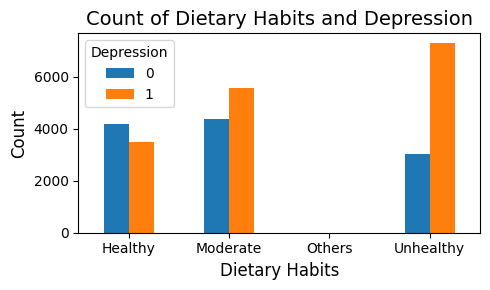

In [25]:
DH.plot(kind='bar', figsize=(5, 3))

plt.title('Count of Dietary Habits and Depression', fontsize=14)
plt.xlabel('Dietary Habits', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

건강한 식단을 이용할 수록 우울증 증세를 겪는 사람이 적다는 사실 확인.\
목적이 분류를 위한 확실한 정제이므로 Others 항목도 제거.

In [26]:
Degree = df[['Degree', 'Depression']].copy()
Degree = Degree.groupby(['Degree', 'Depression']).size().reset_index(name='Count')
Degree = Degree.groupby(['Degree', 'Depression'])['Count'].sum().unstack()
Degree

Depression,0,1
Degree,,
B.Arch,607,871
B.Com,653,853
B.Ed,845,1021
B.Pharm,382,428
B.Tech,497,655
BA,279,321
BBA,289,407
BCA,614,818
BE,279,334


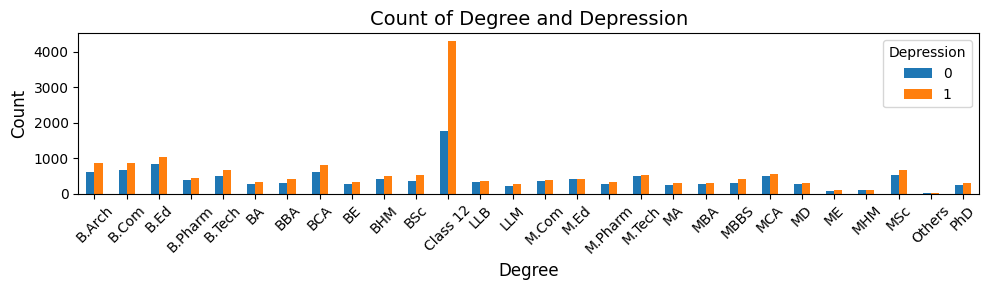

In [27]:
Degree.plot(kind='bar', figsize=(10, 3))

plt.title('Count of Degree and Depression', fontsize=14)
plt.xlabel('Degree', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

Class 12(한국의 고등학교 3학년, 입시반)의 경우가 압도적으로 우울증 증세를 보이는 비율이 높음.

In [28]:
thoughts = df[['Have you ever had suicidal thoughts ?', 'Depression']].copy()
thoughts = thoughts.groupby(['Have you ever had suicidal thoughts ?', 'Depression']).size().reset_index(name='Count')
thoughts = thoughts.groupby(['Have you ever had suicidal thoughts ?', 'Depression'])['Count'].sum().unstack()
thoughts

Depression,0,1
Have you ever had suicidal thoughts ?,,
No,7864,2378
Yes,3699,13957


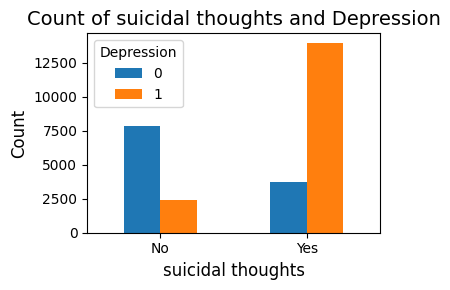

In [29]:
thoughts.plot(kind='bar', figsize=(4, 3))

plt.title('Count of suicidal thoughts and Depression', fontsize=14)
plt.xlabel('suicidal thoughts', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

우울증 증세를 보이는 인원의 경우가 압도적으로 자살에 대한 고민을 했다고 응답함.\
하지만 우울증 증세를 보이지 않는 경우에도 고민한 경우가 있음.

In [30]:
SH = df[['Work/Study Hours', 'Depression']].copy()
SH = SH.groupby(['Work/Study Hours', 'Depression']).size().reset_index(name='Count')
SH = SH.groupby(['Work/Study Hours', 'Depression'])['Count'].sum().unstack()
SH

Depression,0,1
Work/Study Hours,,
0,1096,604
1,686,464
2,894,696
3,773,697
4,799,815
5,590,706
6,959,1288
7,825,1176
8,941,1568


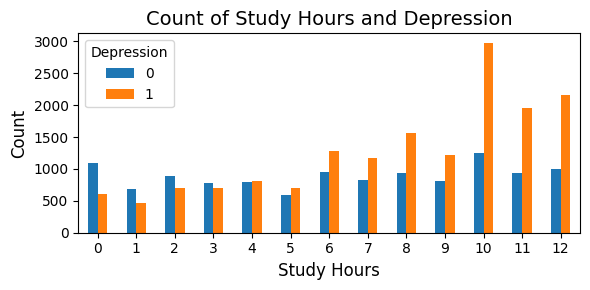

In [31]:
SH.plot(kind='bar', figsize=(6, 3))

plt.title('Count of Study Hours and Depression', fontsize=14)
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

공부시간이 4시간을 초과할 경우 우울증 증세를 보이는 비율이 높음.\
10시간을 초과할 경우 압도적으로 그 비율이 높음.

In [32]:
FS = df[['Financial Stress', 'Depression']].copy()
FS = FS.groupby(['Financial Stress', 'Depression']).size().reset_index(name='Count')
FS = FS.groupby(['Financial Stress', 'Depression'])['Count'].sum().unstack()
FS

Depression,0,1
Financial Stress,,
1.0,3489,1632
2.0,2886,2175
3.0,2146,3080
4.0,1785,3990
5.0,1257,5458


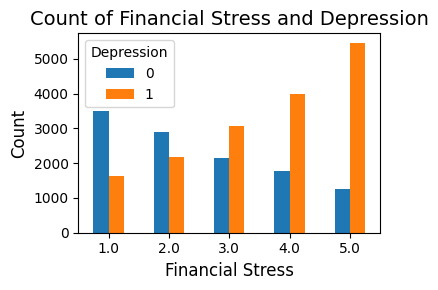

In [33]:
FS.plot(kind='bar', figsize=(4, 3))

plt.title('Count of Financial Stress and Depression', fontsize=14)
plt.xlabel('Financial Stress', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

금전적인 스트레스(부담)이 강해질 수록 우울증 증세를 보이는 비율이 현저히 증가.\
학생의 경우 집안의 경제력으로 볼 수 있음.

In [34]:
Family = df[['Family History of Mental Illness', 'Depression']].copy()
Family = Family.groupby(['Family History of Mental Illness', 'Depression']).size().reset_index(name='Count')
Family = Family.groupby(['Family History of Mental Illness', 'Depression'])['Count'].sum().unstack()
Family

Depression,0,1
Family History of Mental Illness,,
No,6335,8062
Yes,5228,8273


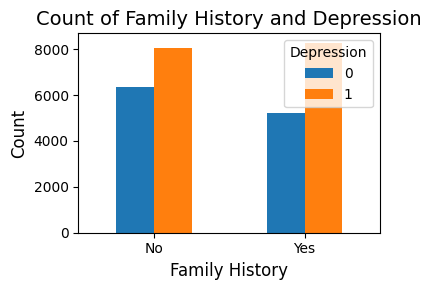

In [35]:
Family.plot(kind='bar', figsize=(4, 3))

plt.title('Count of Family History and Depression', fontsize=14)
plt.xlabel('Family History', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

가족력과 상관성이 없어도 우울증 증세를 나타내는 인원이 다수 존재.\
가족력이 있는 경우의 비율은 더 높음.

# EDA - 전처리(2차)

In [36]:
df = df.drop(['Work Pressure', 'Job Satisfaction'] ,axis=1)
df = df[(df['Age'] < 40)]
df = df[(df['Profession'] == 'Student')]
df = df.drop(['Profession'] ,axis=1)
df = df[df['Dietary Habits'] != 'Others']

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27836 entries, 0 to 27897
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27836 non-null  object 
 1   Age                                    27836 non-null  int64  
 2   City                                   27836 non-null  object 
 3   Academic Pressure                      27836 non-null  int64  
 4   CGPA                                   27836 non-null  float64
 5   Study Satisfaction                     27836 non-null  int64  
 6   Sleep Duration                         27836 non-null  object 
 7   Dietary Habits                         27836 non-null  object 
 8   Degree                                 27836 non-null  object 
 9   Have you ever had suicidal thoughts ?  27836 non-null  object 
 10  Work/Study Hours                       27836 non-null  int64  
 11  Financi

In [37]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,Visakhapatnam,5,8.97,2,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,Female,24,Bangalore,2,5.90,5,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,Male,31,Srinagar,3,7.03,5,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,Female,28,Varanasi,3,5.59,2,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,Female,25,Jaipur,4,8.13,3,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


In [38]:
AP = df[['Academic Pressure', 'Depression']].copy()
AP = AP.groupby(['Academic Pressure', 'Depression']).size().reset_index(name='Count')
AP = AP.groupby(['Academic Pressure', 'Depression'])['Count'].sum().unstack()
AP

Depression,0,1
Academic Pressure,,
0,5,4
1,3861,931
2,2608,1563
3,2968,4472
4,1228,3920
5,873,5403


학생을 제외한 직업군을 삭제한 후 학업 스트레스 0인 학생이 그대로 존재.\
특수 케이스라 판단.

In [39]:
CGPA = df[['CGPA', 'Depression']].copy()

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

CGPA['CGPA_Group'] = pd.cut(CGPA['CGPA'], bins=bins, labels=labels, right=False)

CGPA = CGPA.groupby(['CGPA_Group', 'Depression'], observed=True).size().reset_index(name='Count')
CGPA = CGPA.groupby(['CGPA_Group', 'Depression'], observed=True)['Count'].sum().unstack()

CGPA = CGPA.fillna(0)
CGPA

Depression,0,1
CGPA_Group,,
0,5,4
5,2398,2992
6,1728,2568
7,2461,3072
8,2311,4079
9,2612,3548


CGPA점수가 0점인 인원 수와 학업 스트레스가 0인 인원 수가 같음.

In [40]:
df[(df['CGPA']==0) & (df['Academic Pressure']==0)]

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4365,Male,38,Chennai,0,0.0,0,5-6 hours,Healthy,Class 12,No,2,3.0,No,0
13907,Female,20,Ahmedabad,0,0.0,0,Less than 5 hours,Moderate,Class 12,Yes,12,3.0,Yes,1
14853,Male,21,Lucknow,0,0.0,0,7-8 hours,Moderate,Class 12,Yes,3,3.0,Yes,0
20910,Male,18,Ahmedabad,0,0.0,0,Less than 5 hours,Moderate,Class 12,Yes,9,5.0,No,1
25743,Male,18,Rajkot,0,0.0,0,7-8 hours,Moderate,Class 12,Yes,9,4.0,No,1
26716,Female,24,Meerut,0,0.0,0,More than 8 hours,Unhealthy,Class 12,No,0,5.0,No,0


전부 동일인물은 아님.

In [41]:
SS = df[['Study Satisfaction', 'Depression']].copy()
SS = SS.groupby(['Study Satisfaction', 'Depression']).size().reset_index(name='Count')
SS = SS.groupby(['Study Satisfaction', 'Depression'])['Count'].sum().unstack()
SS

Depression,0,1
Study Satisfaction,,
0,4,6
1,1590,3847
2,2067,3762
3,2461,3344
4,3092,3253
5,2329,2081


학업 만족도 부분 역시 특수케이스 존재.

In [42]:
SD = df[['Sleep Duration', 'Depression']].copy()
SD = SD.groupby(['Sleep Duration', 'Depression']).size().reset_index(name='Count')
SD = SD.groupby(['Sleep Duration', 'Depression'])['Count'].sum().unstack()
SD

Depression,0,1
Sleep Duration,,
5-6 hours,2659,3506
7-8 hours,2970,4358
Less than 5 hours,2943,5351
More than 8 hours,2962,3069
Others,9,9


In [43]:
Others = df[df['Sleep Duration']=='Others']
Others

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1963,Female,30,Ludhiana,3,5.42,2,Others,Unhealthy,B.Ed,Yes,1,2.0,No,0
3807,Female,18,Agra,3,6.03,4,Others,Unhealthy,BA,Yes,12,5.0,No,1
3984,Female,27,Ludhiana,4,5.08,5,Others,Healthy,M.Tech,Yes,8,5.0,Yes,1
4534,Female,22,Srinagar,4,6.92,3,Others,Moderate,MCA,Yes,3,3.0,Yes,1
5525,Female,31,Delhi,2,7.27,5,Others,Healthy,B.Arch,No,3,1.0,No,0
5785,Male,23,Mumbai,5,8.52,4,Others,Moderate,BE,Yes,12,4.0,Yes,1
6739,Male,20,Vasai-Virar,3,6.37,2,Others,Unhealthy,BSc,No,10,1.0,No,0
7695,Male,31,Kalyan,3,8.21,4,Others,Moderate,BA,No,2,3.0,No,0
7874,Female,28,Visakhapatnam,4,6.38,5,Others,Moderate,M.Ed,No,8,3.0,No,0
12932,Male,28,Nagpur,2,7.85,4,Others,Unhealthy,BA,Yes,10,4.0,No,1


Others의 경우 결측치(불규칙해서 잘 모르겠다)로 선분류.

수치형 변수와 수면시간 간의 상관관계가 존재하는지 알아보기 위한 ANOVA 분석

수치형 변수

In [44]:
numerical_columns = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']

In [45]:
from scipy import stats

for column in numerical_columns:
    f_statistic, p_value = stats.f_oneway(
        df[df['Sleep Duration'] == '5-6 hours'][column],
        df[df['Sleep Duration'] == '7-8 hours'][column],
        df[df['Sleep Duration'] == 'Less than 5 hours'][column],
        df[df['Sleep Duration'] == 'More than 8 hours'][column]
    )
    
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")
    print(f"'{column}'")
    print("-" * 50)

F-statistic: 1.4651878216837302
P-value: 0.2218220294656387
'Age'
--------------------------------------------------
F-statistic: 20.782951347653707
P-value: 1.9140571206309424e-13
'Academic Pressure'
--------------------------------------------------
F-statistic: 4.608468602586246
P-value: 0.003157406788692538
'CGPA'
--------------------------------------------------
F-statistic: 1.9770291466526182
P-value: 0.11503785420320993
'Study Satisfaction'
--------------------------------------------------
F-statistic: 19.008166272783534
P-value: 2.6117158998728393e-12
'Work/Study Hours'
--------------------------------------------------
F-statistic: 2.9558327158698052
P-value: 0.03112312938231652
'Financial Stress'
--------------------------------------------------


유의수준 0.05 기준으로 Academic Pressure, CGPA, Work/Study Hours 값이 상관관계가 있다고 판단.\
우울증 증세의 경우는 0과 1로 이루어진 범주형 변수로 판단하여 카이제곱 검정을 실시한다.

범주형 변수와 수면시간 간의 상관관계가 존재하는지 알아보기 위한 카이제곱 검정

범주형 변수

In [46]:
categorical_columns = ['Gender', 'City', 'Dietary Habits', 'Degree',
                       'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']

In [47]:
from scipy.stats import chi2_contingency

for column in categorical_columns:
    contingency_table = pd.crosstab(df['Sleep Duration'], df[column])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square test for 'Sleep Duration' and '{column}':")
    print(f"P-value: {p_value}")
    print(f"'{column}'")
    print("-" * 50)

Chi-square test for 'Sleep Duration' and 'Gender':
P-value: 0.28017853728824466
'Gender'
--------------------------------------------------
Chi-square test for 'Sleep Duration' and 'City':
P-value: 0.0054444467116560764
'City'
--------------------------------------------------
Chi-square test for 'Sleep Duration' and 'Dietary Habits':
P-value: 0.0029543804872221953
'Dietary Habits'
--------------------------------------------------
Chi-square test for 'Sleep Duration' and 'Degree':
P-value: 9.955926317437194e-07
'Degree'
--------------------------------------------------
Chi-square test for 'Sleep Duration' and 'Have you ever had suicidal thoughts ?':
P-value: 7.263277753053908e-28
'Have you ever had suicidal thoughts ?'
--------------------------------------------------
Chi-square test for 'Sleep Duration' and 'Family History of Mental Illness':
P-value: 0.25035564659010123
'Family History of Mental Illness'
--------------------------------------------------
Chi-square test for 'Sleep

유의수준 0.05 기준으로 City, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Depression 값이 상관관계가 있다고 판단.

유의미 변수 : Academic Pressure, CGPA, Work/Study Hours, City, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Depression

In [48]:
stand = df[['Academic Pressure', 'CGPA', 'Work/Study Hours', 'City', 'Dietary Habits', 'Degree',
            'Have you ever had suicidal thoughts ?', 'Depression', 'Sleep Duration']]

stand

,Academic Pressure,CGPA,Work/Study Hours,City,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Depression,Sleep Duration
0,5,8.97,3,Visakhapatnam,Healthy,B.Pharm,Yes,1,5-6 hours
1,2,5.90,3,Bangalore,Moderate,BSc,No,0,5-6 hours
2,3,7.03,9,Srinagar,Healthy,BA,No,0,Less than 5 hours
3,3,5.59,4,Varanasi,Moderate,BCA,Yes,1,7-8 hours
4,4,8.13,1,Jaipur,Moderate,M.Tech,Yes,0,5-6 hours
...,...,...,...,...,...,...,...,...,...
27893,5,5.75,7,Surat,Unhealthy,Class 12,Yes,0,5-6 hours
27894,2,9.40,0,Ludhiana,Healthy,MSc,No,0,Less than 5 hours
27895,3,6.61,12,Faridabad,Unhealthy,MD,No,0,5-6 hours
27896,5,6.88,10,Ludhiana,Healthy,Class 12,Yes,1,Less than 5 hours


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, precision_score, accuracy_score, f1_score

train_set = stand[stand['Sleep Duration'] != 'Others']
test_set = stand[stand['Sleep Duration'] == 'Others']

In [50]:
x = train_set.drop('Sleep Duration', axis=1)
y = train_set['Sleep Duration']
x_encoded = pd.get_dummies(x)

x_train, x_valid, y_train, y_valid = train_test_split(x_encoded, y, test_size=0.2, random_state=2024)

smote = SMOTE(random_state=2024)
x_train, y_train = smote.fit_resample(x_train, y_train)

C:\Users\skt75\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\skt75\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [51]:
y_encoded = pd.get_dummies(y_train)

train_set_y1 = y_encoded['Less than 5 hours']
train_set_y2 = y_encoded['5-6 hours']
train_set_y3 = y_encoded['7-8 hours']
train_set_y4 = y_encoded['More than 8 hours']

5시간 미만

In [52]:
md = RandomForestClassifier(n_estimators=300, random_state=2024, max_depth=20)
md.fit(x_train, train_set_y1)

pred_1 = md.predict_proba(x_valid)
pred_1 = pred_1[:, 1]

5-6시간대

In [53]:
md = RandomForestClassifier(n_estimators=300, random_state=2024, max_depth=20)
md.fit(x_train, train_set_y2)

pred_2 = md.predict_proba(x_valid)
pred_2 = pred_2[:, 1]

7-8시간대

In [54]:
md = RandomForestClassifier(n_estimators=300, random_state=2024, max_depth=20)
md.fit(x_train, train_set_y3)

pred_3 = md.predict_proba(x_valid)
pred_3 = pred_3[:, 1]

8시간 초과

In [55]:
md = RandomForestClassifier(n_estimators=300, random_state=2024, max_depth=20)
md.fit(x_train, train_set_y4)

pred_4 = md.predict_proba(x_valid)
pred_4 = pred_4[:, 1]

In [56]:
pred = pd.DataFrame({'Less than 5 hours':pred_1, '5-6 hours':pred_2, '7-8 hours':pred_3, 'More than 8 hours':pred_4})

pred['result'] = pred.apply(lambda row: row.idxmax(), axis=1)

pred

,Less than 5 hours,5-6 hours,7-8 hours,More than 8 hours,result
0,0.290129,0.249567,0.240145,0.206074,Less than 5 hours
1,0.197339,0.340271,0.234924,0.218350,5-6 hours
2,0.270096,0.232382,0.234130,0.239255,Less than 5 hours
3,0.214663,0.264931,0.282644,0.300703,More than 8 hours
4,0.242760,0.203911,0.285412,0.162631,7-8 hours
...,...,...,...,...,...
5559,0.256552,0.257378,0.235137,0.249667,5-6 hours
5560,0.355022,0.215120,0.287551,0.196869,Less than 5 hours
5561,0.251412,0.210229,0.237226,0.324231,More than 8 hours
5562,0.303600,0.312936,0.296421,0.136987,5-6 hours


In [57]:
accuracy_score(y_valid, pred['result'])

0.2909777138749101

xgboost와 랜덤 포레스트를 사용한 결과, SMOTE를 활용해 훈련한 랜덤 포레스트 모델의 정확도가 0.3으로 가장 높음.

약 27900개의 데이터 중, 18개 밖에 되지 않는 데이터이므로, 삭제 혹은 단순 최빈값 대체가 가장 효율성이 높아보임.\
청년 우울증에 관한 분석을 위한 모델링이 유의미한 것인가에 대한 확인이 목적이므로, 데이터를 삭제하여 Noise 제거로 결정.

In [58]:
df = df[df['Sleep Duration']!='Others']

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27818 entries, 0 to 27897
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27818 non-null  object 
 1   Age                                    27818 non-null  int64  
 2   City                                   27818 non-null  object 
 3   Academic Pressure                      27818 non-null  int64  
 4   CGPA                                   27818 non-null  float64
 5   Study Satisfaction                     27818 non-null  int64  
 6   Sleep Duration                         27818 non-null  object 
 7   Dietary Habits                         27818 non-null  object 
 8   Degree                                 27818 non-null  object 
 9   Have you ever had suicidal thoughts ?  27818 non-null  object 
 10  Work/Study Hours                       27818 non-null  int64  
 11  Financi

27848 -> 27830으로 전체 데이터 감소

Family History of Mental Illness와 Have you ever had suicidal thoughts ?의 경우, Yes와 No로 이루어진 변수 이므로, 0과 1로 변환해 사용.\
Gender의 경우 남자는 1 여자는 0으로 변경해 사용 가능

In [59]:
import numpy as np

df['Family History of Mental Illness'] = np.where(df['Family History of Mental Illness'] == 'Yes', 1, 0)
df['Have you ever had suicidal thoughts ?'] = np.where(df['Have you ever had suicidal thoughts ?'] == 'Yes', 1, 0)
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)

In [60]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33,Visakhapatnam,5,8.97,2,5-6 hours,Healthy,B.Pharm,1,3,1.0,0,1
1,0,24,Bangalore,2,5.90,5,5-6 hours,Moderate,BSc,0,3,2.0,1,0
2,1,31,Srinagar,3,7.03,5,Less than 5 hours,Healthy,BA,0,9,1.0,1,0
3,0,28,Varanasi,3,5.59,2,7-8 hours,Moderate,BCA,1,4,5.0,1,1
4,0,25,Jaipur,4,8.13,3,5-6 hours,Moderate,M.Tech,1,1,1.0,0,0


# 전처리 - 범주형 변수 간 독립성 확인

In [61]:
df = df.rename(columns={
    'Academic Pressure': 'AcademicPressure',
    'Study Satisfaction': 'StudySatisfaction',
    'Sleep Duration': 'Sleep',
    'Dietary Habits': 'Dietary',
    'Have you ever had suicidal thoughts ?': 'SuicidalThoughts',
    'Work/Study Hours': 'StudyHours',
    'Financial Stress': 'FinancialStress',
    'Family History of Mental Illness': 'FamilyHistory',
})

전처리 및 모델링 진행을 위해 변수명의 공백 제거

In [62]:
import numpy as np

columns = ['City', 'Sleep', 'Dietary', 'Degree']

In [63]:
p_values_matrix = np.zeros((len(columns), len(columns)))

for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        contingency_table = pd.crosstab(df[col1], df[col2])
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        p_values_matrix[i, j] = p_value

p_values_df = pd.DataFrame(p_values_matrix, columns=columns, index=columns)

p_values_df = pd.DataFrame(np.where(p_values_df == 0, '0', p_values_df))
p_values_df

,0,1,2,3
0,0,4.3988310085764716e-05,1.2143514738284796e-20,0
1,4.398831008576475e-05,0,0.0010884547743876022,2.0074784728099726e-05
2,1.2143514738284796e-20,0.0010884547743876022,0,8.591275743418765e-24
3,0,2.0074784728099726e-05,8.591275743419012e-24,0


독립성 검정 시행 시 p-value가 매우 낮은 조합
1. City - Sleep
2. City - Dietary
3. City - Degree
4. Sleep - Degree
5. Dietary - Degree

City와 Degree 두 변수를 제거해 변수간 높은 상관관계를 방지 가능.

In [64]:
df = df.drop(['City', 'Degree'], axis=1)

df.head()

,Gender,Age,AcademicPressure,CGPA,StudySatisfaction,Sleep,Dietary,SuicidalThoughts,StudyHours,FinancialStress,FamilyHistory,Depression
0,1,33,5,8.97,2,5-6 hours,Healthy,1,3,1.0,0,1
1,0,24,2,5.90,5,5-6 hours,Moderate,0,3,2.0,1,0
2,1,31,3,7.03,5,Less than 5 hours,Healthy,0,9,1.0,1,0
3,0,28,3,5.59,2,7-8 hours,Moderate,1,4,5.0,1,1
4,0,25,4,8.13,3,5-6 hours,Moderate,1,1,1.0,0,0


# 전처리 - 수치형 변수 간 독립성 확인

In [65]:
numeric_df = df.drop(['Sleep', 'Dietary'], axis=1)
numeric_df.corr()

,Gender,Age,AcademicPressure,CGPA,StudySatisfaction,SuicidalThoughts,StudyHours,FinancialStress,FamilyHistory,Depression
Gender,1.000000,0.010015,-0.022358,0.036337,-0.015317,-0.001593,0.012944,-0.005382,-0.015970,0.001750
Age,0.010015,1.000000,-0.076786,0.005178,0.009874,-0.113334,-0.032062,-0.096865,-0.006230,-0.226847
AcademicPressure,-0.022358,-0.076786,1.000000,-0.022403,-0.110936,0.261914,0.096236,0.152109,0.029763,0.474938
CGPA,0.036337,0.005178,-0.022403,1.000000,-0.043965,0.007742,0.002993,0.005925,-0.004311,0.022287
StudySatisfaction,-0.015317,0.009874,-0.110936,-0.043965,1.000000,-0.083592,-0.036510,-0.065185,-0.003559,-0.168240
SuicidalThoughts,-0.001593,-0.113334,0.261914,0.007742,-0.083592,1.000000,0.122221,0.209735,0.025981,0.547075
StudyHours,0.012944,-0.032062,0.096236,0.002993,-0.036510,0.122221,1.000000,0.075216,0.017568,0.208900
FinancialStress,-0.005382,-0.096865,0.152109,0.005925,-0.065185,0.209735,0.075216,1.000000,0.008515,0.363715
FamilyHistory,-0.015970,-0.006230,0.029763,-0.004311,-0.003559,0.025981,0.017568,0.008515,1.000000,0.053562
Depression,0.001750,-0.226847,0.474938,0.022287,-0.168240,0.547075,0.208900,0.363715,0.053562,1.000000


수치형 변수 간 유의미하게 높은 상관관계를 보는 변수는 없다.

# 모델링

처리된 데이터를 통해 청년 우울증 증세를 나타내는 유의미한 변수를 확인하기 위한 로지스틱 회귀 진행

공백이 들어간 column명 변경

In [66]:
df['Dietary'].unique()

array(['Healthy', 'Moderate', 'Unhealthy'], dtype=object)

In [67]:
from statsmodels.formula.api import logit

formula = "Depression ~ Gender + Age + AcademicPressure + CGPA + StudySatisfaction + Sleep + Dietary + SuicidalThoughts + StudyHours + FinancialStress + FamilyHistory"
model = logit(formula=formula, data = df).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.348874
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Depression   No. Observations:                27818
Model:                          Logit   Df Residuals:                    27803
Method:                           MLE   Df Model:                           14
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                  0.4858
Time:                        17:52:56   Log-Likelihood:                -9705.0
converged:                       True   LL-Null:                       -18874.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -3.8580      0.172    -22.430      0.000      -4.195      -3.521
Sleep[T.7-8 hours]             0.0215      0.052      0.416      0.677      -0.080       0.123
Sleep[T.Less than 5 hours]     0.3696      0.051      7.217      0.000       0.269       0.470
Sleep[T.More than 8 hours]    -0.2539      0.054     -4.673      0.000      -0.360      -0.147
Dietary[T.Moderate]            0.4725      0.045     10.467      0.000       0.384       0.561
Dietary[T.Unhealthy]           1.0912      0.046     23.546      0.000       1.000       1.182
Gender                        -0.0054      0.037     -0.147      0.883      -0.077       0.067
Age                           -0.1101      0.004    -28.581      0.000      -0.118      -0.103
AcademicPressure               0.8374      0.015     56.398      0.000       0.808       0.867
CGPA                           0.0617      0.012      4.980      0.000       0.037       0.086
StudySatisfaction             -0.2450      0.014    -18.067      0.000      -0.272      -0.218
SuicidalThoughts               2.5124      0.039     64.208      0.000       2.436       2.589
StudyHours                     0.1175      0.005     23.600      0.000       0.108       0.127
FinancialStress                0.5530      0.013     41.431      0.000       0.527       0.579
FamilyHistory                  0.2460      0.036      6.748      0.000       0.175       0.317
==============================================================================================
"""

Gender 변수의 경우 P-value 0.883으로 유의하지 않음으로 모델에서 제거.

In [68]:
formula = "Depression ~ Age + AcademicPressure + CGPA + StudySatisfaction + Sleep + Dietary + SuicidalThoughts + StudyHours + FinancialStress + FamilyHistory"
model = logit(formula=formula, data = df).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.348875
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Depression   No. Observations:                27818
Model:                          Logit   Df Residuals:                    27804
Method:                           MLE   Df Model:                           13
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                  0.4858
Time:                        17:52:56   Log-Likelihood:                -9705.0
converged:                       True   LL-Null:                       -18874.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -3.8604      0.171    -22.546      0.000      -4.196      -3.525
Sleep[T.7-8 hours]             0.0216      0.052      0.417      0.677      -0.080       0.123
Sleep[T.Less than 5 hours]     0.3695      0.051      7.216      0.000       0.269       0.470
Sleep[T.More than 8 hours]    -0.2540      0.054     -4.674      0.000      -0.360      -0.147
Dietary[T.Moderate]            0.4724      0.045     10.466      0.000       0.384       0.561
Dietary[T.Unhealthy]           1.0907      0.046     23.599      0.000       1.000       1.181
Age                           -0.1101      0.004    -28.582      0.000      -0.118      -0.103
AcademicPressure               0.8374      0.015     56.412      0.000       0.808       0.867
CGPA                           0.0616      0.012      4.978      0.000       0.037       0.086
StudySatisfaction             -0.2450      0.014    -18.067      0.000      -0.272      -0.218
SuicidalThoughts               2.5124      0.039     64.207      0.000       2.436       2.589
StudyHours                     0.1175      0.005     23.603      0.000       0.108       0.127
FinancialStress                0.5531      0.013     41.433      0.000       0.527       0.579
FamilyHistory                  0.2461      0.036      6.751      0.000       0.175       0.318
==============================================================================================
"""

# 결과 해석

관점 1 : 나이가 많을수록 우울증의 확률이 적다.

인도 학생들의 우울증에 관한 조사이기 때문에 다시 바라볼 필요가 있다.\
인도의 경우 매년 1만 명 이상의 학생이 입시 스트레스로 극단적인 선택을 한다.\
이는 대학 진학을 위한 10대 후반의 학생들의 스트레스가 매우 과도한 상태라고 판단 가능하다.\
또한 아직 졸업을 하지 않아 일자리를 얻지 못한 20대 초반의 대학생들의 스트레스도 크다고 볼 수 있다.\
이를 뒷받침하는 것이 AcademicPressure(학업적 스트레스)와 FinancialStress(경제적 스트레스)의 계수가 상위권에 위치한 것으로 파악할 수 있다.\
따라서 졸업을 하고 일자리를 얻게되면서 조금이나마 두 가지 스트레스에서 벗어나기 때문이라고 생각할 수 있다.

관점 2 : 학업적 관점

학업 만족도가 클수록 우울증을 겪을 확률이 내려간다.\
StudySatisfaction의 계수는 약 -0.245로 많이 크진 않지만 유의미하게 줄여줄 수 있다고 판단된다.

그러나 학업적인 만족도가 높다고 학업적 성취(CGPA)가 높다거나 학업적 스트레스(AcademicPressure)가 낮다는 것은 아니다.\
이들은 큰 상관관계를 보이지 않았다.\
학업적 만족도가 높은 것도 중요하지만 반대로 학업적인 스트레스를 덜 받게 해주는 것이 더 중요하다.

관점 3 : 수면시간이 길수록 우울증의 확률이 적다.

수면시간이 5-6시간이냐 7-8시간이냐는 큰 차이를 보이지 않고, 5시간 미만인가 혹은 8시간을 초과했는가는 유의미하다.\
이는 필수적인 수면시간을 기준으로 수면시간이 더 길다면 우울증 해소에 도움을 줄 수 있다고 판단할 수 있다.\
그러나 이미 우울증 증세를 가지고 있는 학생을 기준으로 조사를 진행한 것이기 때문에\
우울증으로 인해 수면시간이 적어지는 것인지, 수면시간이 적어져 우울증에 취약한 것인지는 인과관계 파악이 필요하다.

위의 의견을 제외하더라도 수면시간을 충분히 가져주는 것이 실제로 건강에 유의미하기 때문에\
우울증을 피하거나 개선하기 위해서는 충분한 수면을 가지도록 하는 것이 중요하다 판단할 수 있다.

관점 4 : 금전적 관점

학생들을 조사한 것임에도 불구하고, 금전적인 스트레스가 우울증에 큰 영향을 미친다는 결과를 보인다.\
이는 취업을 하지 못해 금전적으로 스트레스를 받는 2,30대의 영향이 크게 나타난 것으로 판단되며,\
10대 학생 역시 집안의 경제력의 영향을 받기 충분하다는 것으로 생각해볼 수 있다.

이러한 금전적 관점에 있어서 학생 뿐만 아니라 우리나라 2,30대 청년들의 우울증관련 분석을 진행할 때,\
소득과 같은 금전적인 부분에 있어 활용할 수 있다는 증거가 된다.

관점 5 : 건강한 식습관일수록 우울증의 확률이 적다.

건강한 식습관을 가질수록 우울증에 더 강한 지표를 보이고 있다.\
우울증을 가지고 있는 인원의 데이터 수가 더 많은 것을 감안할 때,\
건강한 식습관을 가지고 있는 사람은 우울증을 가지지 않은 사람의 비율이 더 높은 것으로 보아 이는 확실한 지표로 판단된다.

따라서 건강한 식습관을 유지할 수 있도록 하는 것이 중요하지만,\
제대로된 식습관을 위해 현대인에 맞춘 식습관에 대한 연구도 병행하면 좋은 효과를 낼 수 있을 것으로 생각된다.

관점 6 : 활동시간

다른 변수들에 비해 비율은 높지 않지만 공부시간 역시 우울증에 영향을 미치는 것으로 분석된다.\
이는 학생이라는 특수성을 고려하면 공부는 모두 하는 것이기 때문에 충분히 적을 수 있다.\
이를 변형하여 학생이 아닌 2,30대의 경우를 분석할 때, 근로시간을 기준으로 데이터를 수집하면 도움이 될 것이라 판단된다.

관점 7 : 자살에 관한 심각한 고민 유무

자살에 관한 심각한 고민을 해본 적이 있다면 우울증을 겪고 있을 확률이 높다고 분석된다.\
분석에 포함하지 않더라도 위험군으로 분류될 수 있는 항목이며,\
실제 조사 시 거짓으로 진술할 위험도 존재하기에 이는 변수에서 제외해도 상관없음으로 판단된다.

관점 8 : 가족력의 유무

우울증을 가진 부모 혹은 조상이 있다면 이 역시 자손들에게 영향을 미칠 수 있다는 것으로 분석된다.\
다만, 이는 쉽게 검사할 수 없으므로 도움은 되지만 간단한 진단용으로는 부적합할 수 있다.

# 최종 모델

In [76]:
from sklearn.linear_model import LogisticRegression

X = df[['Sleep', 'Dietary', 'Age', 'AcademicPressure', 'CGPA', 'StudySatisfaction', 'StudyHours', 'FinancialStress']]
Y = df['Depression']
X_encoded = pd.get_dummies(X)

x_train, x_valid, y_train, y_valid = train_test_split(X_encoded, Y, test_size=0.2, random_state=2024)

model = LogisticRegression()
model.fit(x_train, y_train)

pred = model.predict(x_valid)
print(accuracy_score(y_valid, pred))
print(f1_score(y_valid, pred, average='macro'))

0.7981667864845435
0.7911337057470411


f1_score = 0.791로 비교적 좋은 성능이 나왔으며, 이는 지금 소개된 8개의 변수로 간단한 진단을 취해도 괜찮은 성능을 보인다.\
정확도 역시 0.798로 굉장히 좋은 성능을 보이지는 않지만, f1_score와 비슷한 점수로 좋은 조화를 이루고 있다.\
8가지의 간단한 진단으로 모델링을 했다는 것을 감안했을 때, 비교적 좋은 성능이다.

1. 학생 기준으로의 간다 진단\
수면시간, 식습관, 나이, 학업적 스트레스, 학업적 성취, 학업 만족도, 공부시간, 경제적 스트레스

2. 직장인 기준으로의 간단 진단\
수면시간, 식습관, 나이, 직업적 스트레스, 직업적 성취, 직업 만족도, 근무시간, 경제적 스트레스

데이터 수집을 통해 두 가지의 모델을 만들면 학교, 직장 등에서 간단한 주변 조사를 통해\
간단한 진단을 통해 학생과 직장인의 우울증 예방과 나아가서 삶의 질을 향상시키는 정책을 준비하는 데 도움을 줄 수 있을 것이다.